In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
import string
import nltk
%matplotlib inline 
import plotly as py
import cufflinks as cf

In [2]:
df =pd.read_csv("test]/2chem2gene_abstract_chemAcronym_new.i2qy_fb6c04c1-a2a9-44c7-8e30-97e801c33624.tsv",delimiter = '\t')

In [3]:
df.head()

,[SNID] Subject,[PT] Subject,Subject,Predicate,[SNID] Object,[PT] Object,Object,Sentence,Location,#Docs,Doc#,Doc,Source,#Hits,Hit#,Hit
0,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,1,15248671,https://www.ncbi.nlm.nih.gov/pubmed/15248671,1,1,Prognosis of gallbladder carcinoma is poor. Th...
1,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,2,16372671,https://www.ncbi.nlm.nih.gov/pubmed/16372671,1,1,Prognosis of colonic carcinoma is poor. The tw...
2,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,3,15736043,https://www.ncbi.nlm.nih.gov/pubmed/15736043,1,1,Serous papillary carcinomas of the endometrium...
3,nlm.D006684,HLA-DR Antigens,HLA-DR,increased,ncbi.920,CD4,CD4,The results showed decreased expression of HLA...,Standard Abstract,4,4,14598186,https://www.ncbi.nlm.nih.gov/pubmed/14598186,1,1,The antigens encoded by the major histocompabi...
4,nal_thesaurus.3990,lipids,biologically derived lipids,began,ncbi.55294,FBXW7,ago,The systematic study of the mesomorphic phase ...,Standard Abstract,3,1,2054909,https://www.ncbi.nlm.nih.gov/pubmed/2054909,1,1,The systematic study of the mesomorphic phase ...


In [4]:
df['[SNID] Subject'].value_counts()

nal_thesaurus.876                                        13106
nal_thesaurus.6421                                        9229
nal_thesaurus.1560                                        7896
nlm.D000906_group_29_3416ae7808989f28a285db37d4b00b5c     7614
nlm.D000906_group_30_8611b23d8360560c11a88f0a393acb90     7614
                                                         ...  
nal_thesaurus.265177                                         1
nal_thesaurus.271019                                         1
nal_thesaurus.274627                                         1
nal_thesaurus.278590                                         1
nlm.D000076250                                               1
Name: [SNID] Subject, Length: 12317, dtype: int64

In [5]:
data=df.sample(frac=0.002)
data

,[SNID] Subject,[PT] Subject,Subject,Predicate,[SNID] Object,[PT] Object,Object,Sentence,Location,#Docs,Doc#,Doc,Source,#Hits,Hit#,Hit
668898,nlm.D016211,Transforming Growth Factor alpha,TGF-alpha stimulation,added either simultaneously,ncbi.7039,TGFA,TGF-alpha,TGF-beta blocked TGF-alpha stimulation when ad...,Standard Abstract,1,1,2922399,https://www.ncbi.nlm.nih.gov/pubmed/2922399,1,1,We investigated whether transforming growth fa...
680494,nlm.D016718,Arachidonic Acid,main arachidonic acid metabolites,formed,ncbi.4512,COX1,COX-1,By using intact cell system (platelets) as a s...,Standard Abstract,1,1,20219312,https://www.ncbi.nlm.nih.gov/pubmed/20219312,1,1,To evaluate anti-inflammatory activity of sele...
745595,nlm.D051219,Pituitary Adenylate Cyclase-Activating Polypep...,PACAP,exerts,ncbi.3454,IFNAR1,AVP,These findings demonstrate for the first time ...,Standard Abstract,1,1,7579131,https://www.ncbi.nlm.nih.gov/pubmed/7579131,1,1,In order to establish possible stimulatory eff...
9301,chebi.3815,Collagen,collagen,reflected,ncbi.4318,MMP9,MMP-9,Degradation and synthesis of collagen as refle...,Standard Abstract,1,1,15222292,https://www.ncbi.nlm.nih.gov/pubmed/15222292,1,1,Age-related loss of elasticity of the naturall...
604627,nlm.D011803,Quinine,quinine pretreatment,increased,ncbi.8532,CPZ,CPZ,Chloroquine and quinine pretreatment increased...,Standard Abstract,1,1,6622517,https://www.ncbi.nlm.nih.gov/pubmed/6622517,1,1,The metabolic oxidation of chlorpromazine (CPZ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181228,nal_thesaurus.8457,morphine,the cumulative morphine dose,received postoperatively,ncbi.28982,FLVCR1,PCA,The primary outcome measure was the cumulative...,Standard Abstract,1,1,14633755,https://www.ncbi.nlm.nih.gov/pubmed/14633755,1,1,Balanced postoperative analgesia combines non-...
597459,nlm.D011345,Fenofibrate,fenofibrate,activates,ncbi.5562,PRKAA1,AMPK,We report here that fenofibrate activates AMPK...,Standard Abstract,1,1,16442496,https://www.ncbi.nlm.nih.gov/pubmed/16442496,1,1,Fenofibrate improves endothelial function by l...
321604,nal_thesaurus.55167,silicon,silicon,mounted,ncbi.7808,AIR,air,The 355 nm laser pulse from THG (Third Harmoni...,Standard Abstract,1,1,20707170,https://www.ncbi.nlm.nih.gov/pubmed/20707170,1,1,The 355 nm laser pulse from THG (Third Harmoni...
310313,nal_thesaurus.48407,protein kinases,mitogen-activated protein kinases,stimulated,ncbi.7124,TNF,tumor necrosis factor,Although phosphorylation of mitogen-activated ...,Standard Abstract,1,1,11230110,https://www.ncbi.nlm.nih.gov/pubmed/11230110,1,1,Cytokine activation of vascular endothelial ce...


In [6]:
data.to_csv("export_file.csv",index=False)

In [7]:
df = pd.read_csv(r'export_file.csv',usecols=['Object','[PT] Subject'])
df

,[PT] Subject,Object
0,Transforming Growth Factor alpha,TGF-alpha
1,Arachidonic Acid,COX-1
2,Pituitary Adenylate Cyclase-Activating Polypep...,AVP
3,Collagen,MMP-9
4,Quinine,CPZ
...,...,...
1541,morphine,PCA
1542,Fenofibrate,AMPK
1543,silicon,air
1544,protein kinases,tumor necrosis factor


All frequencies, including STOPWORDS:
      Word  Frequency
0        p        181
1        )         66
2        (         65
3      not         36
4  insulin         17
5     trna         14
6        a         14
7     ca2+         14
8   factor         13
9        [         12


C:\Users\Koosha\AppData\Local\Temp/ipykernel_13112/312512261.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



<AxesSubplot:xlabel='Word'>

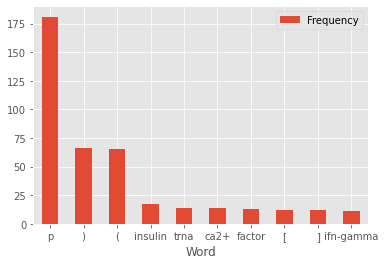

In [12]:
top_N = 10
txt = df.Object.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

           Frequency
Word                
p                178
insulin           17
factor            13
ifn-gamma         11
trna              11
p38               10
air               10
receptor           9
atp                9
protein            9


<AxesSubplot:xlabel='Word'>

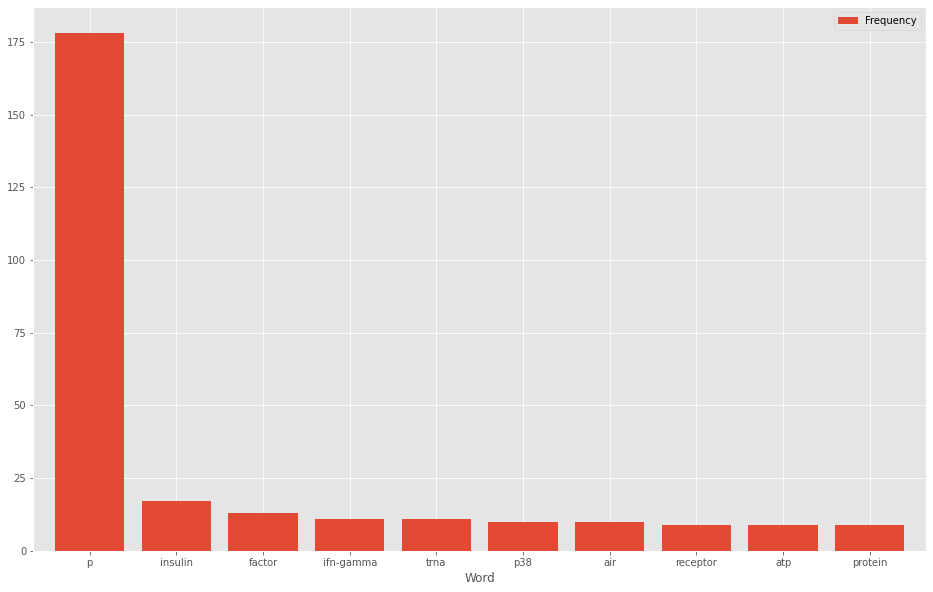

In [16]:
from collections import Counter
top_N = 10


stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df.Object
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)